In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [5]:
df = pd.read_excel("./1-9호선 통합본(중복 제거).xlsx")

In [7]:
df.head()

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0


In [9]:
df.tail()

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0
312,312,흑석,9호선,18235,29833,5437,1,NaN,NaN,NaN,1,1.0,16.0,4.0,40,NaN,56,0


In [11]:
df['소화기 대수'].dtypes

dtype('O')

In [13]:
df['소화기 대수'] = pd.to_numeric(df['소화기 대수'], errors='coerce')

In [15]:
(df['대합실면적']+df["승강장면적"]).dtypes

dtype('float64')

In [17]:
df['면적'] = df['대합실면적']+df["승강장면적"]

In [27]:
# 면적 대비 소화기 대수
df['소화기 대수'] = df['소화기 대수'].astype(float)

In [29]:
df.head()

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수,면적,면적 대비 소화기 대수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47.0,0,5490.0,47.0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43.0,0,9894.0,43.0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0,10805.0,NaN
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68.0,1,10647.0,68.0
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46.0,0,7240.0,46.0


In [70]:
# result_data = df.set_index('평방미터당이용객수')[['에스컬레이터 대수']]

In [72]:
# result_data

In [79]:
# 스타일 테마 설정(스타일 테마 설정 이후에 한글 폰트 설정이 리셋됨)
# sns.set_style("darkgrid")

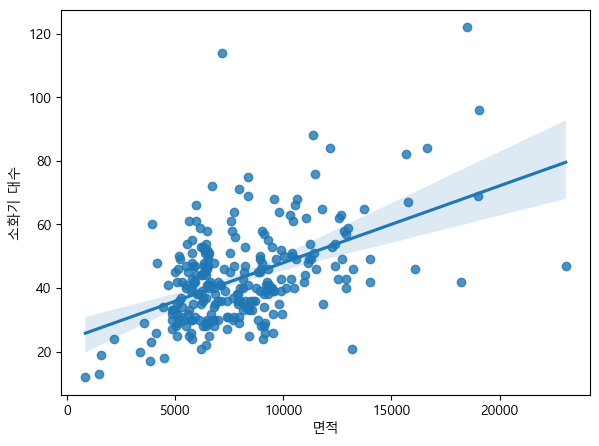

In [31]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)

# 선형회귀선 표시
sns.regplot(x = "면적", # x축 변수
            y = "소화기 대수", # y축 변수
            data = df, # 데이터
            ax = ax1) # axe 객체 - 1번째 그래프

plt.savefig("./fire_extinguisher_per_square_meter.png")

plt.show()

In [ ]:
pl